In this script we will perform velocity analyses on the MAPS project.

In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad
import os
import glob
import anndata
import loompy
import re
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix

In [2]:
os.chdir('/home/andrewliyim/lkgres/projects/PRJ0000044_MAPS/')

Import Seurat-derived anndata

In [3]:
anndataFiles = glob.glob('output/h5ad/*.h5ad')
#maps = ad.read_h5ad('output/h5ad/maps_hs_integrated_clustered_annotated_pass2.h5ad')
maps = ad.read_h5ad('output/h5ad/crc/maps_hs_clean_crc_myeloid.h5ad')

In [4]:
maps.obs.index

Index(['SCS50-1:AAACGAAAGCTCGACCx', 'SCS50-1:AAAGGATCACCCTAAAx',
       'SCS50-1:AAAGGGCCAGCTCTGGx', 'SCS50-1:AAAGGTAAGAGAATCTx',
       'SCS50-1:AACAAAGTCATTGCTTx', 'SCS50-1:AACAAGACAGAACATAx',
       'SCS50-1:AACAAGAGTATTGAGAx', 'SCS50-1:AACCACAAGTGAATACx',
       'SCS50-1:AACCTGAAGTTTGGCTx', 'SCS50-1:AACCTTTAGTGGGAAAx',
       ...
       'SCS88-2:TTGTTGTCACAGTCGCx', 'SCS88-2:TTGTTGTTCTATCGCCx',
       'SCS88-2:TTGTTTGAGATTGAGTx', 'SCS88-2:TTTACCAGTTATAGAGx',
       'SCS88-2:TTTACGTGTACATACCx', 'SCS88-2:TTTAGTCTCGGCTGGTx',
       'SCS88-2:TTTCCTCCACTCATAGx', 'SCS88-2:TTTCCTCTCATCAGTGx',
       'SCS88-2:TTTGACTCATTCCTATx', 'SCS88-2:TTTGGAGAGCAAGTCGx'],
      dtype='object', length=13792)

Combine loom files

In [5]:
velocyto = scv.read('output/loom/velocyto.loom', cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
velocyto

AnnData object with n_obs × n_vars = 125077 × 36601
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [9]:
maps_velo = scv.utils.merge(maps, velocyto)

In [10]:
maps_velo.obs.index

Index(['SCS50-1:AAACGAAAGCTCGACCx', 'SCS50-1:AAAGGATCACCCTAAAx',
       'SCS50-1:AAAGGGCCAGCTCTGGx', 'SCS50-1:AAAGGTAAGAGAATCTx',
       'SCS50-1:AACAAAGTCATTGCTTx', 'SCS50-1:AACAAGACAGAACATAx',
       'SCS50-1:AACAAGAGTATTGAGAx', 'SCS50-1:AACCACAAGTGAATACx',
       'SCS50-1:AACCTGAAGTTTGGCTx', 'SCS50-1:AACCTTTAGTGGGAAAx',
       ...
       'SCS88-2:TTGTTGTCACAGTCGCx', 'SCS88-2:TTGTTGTTCTATCGCCx',
       'SCS88-2:TTGTTTGAGATTGAGTx', 'SCS88-2:TTTACCAGTTATAGAGx',
       'SCS88-2:TTTACGTGTACATACCx', 'SCS88-2:TTTAGTCTCGGCTGGTx',
       'SCS88-2:TTTCCTCCACTCATAGx', 'SCS88-2:TTTCCTCTCATCAGTGx',
       'SCS88-2:TTTGACTCATTCCTATx', 'SCS88-2:TTTGGAGAGCAAGTCGx'],
      dtype='object', length=12827)

In [11]:
maps_velo.obsm["X_umap"] = maps_velo.obsm["X_UMAP"]

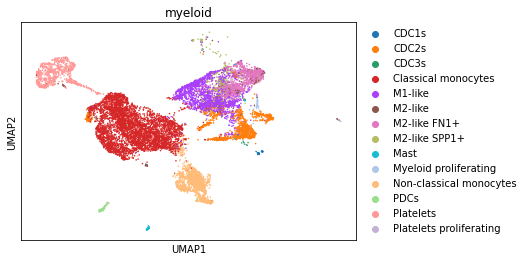

In [12]:
sc.pl.umap(maps_velo, color="celltype_l4", title="myeloid")

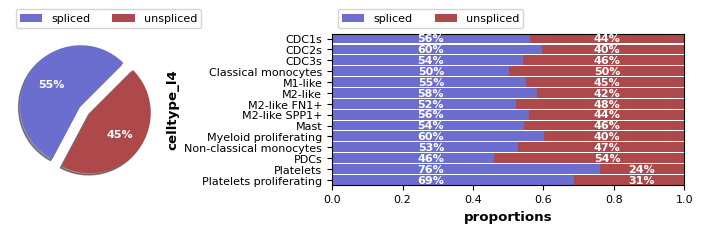

In [13]:
scv.pl.proportions(maps_velo, groupby = "celltype_l4")

In [14]:
scv.pp.filter_and_normalize(maps_velo)
scv.pp.moments(maps_velo)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:21) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:19) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [15]:
scv.tl.velocity(maps_velo, mode='stochastic')

computing velocities
    finished (0:00:32) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [16]:
scv.tl.velocity_graph(maps_velo)

computing velocity graph (using 1/24 cores)


  0%|          | 0/12827 [00:00<?, ?cells/s]

/mnt/nfs/kgres/home/andrewliyim/local/miniconda3/envs/scvelo/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:03:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


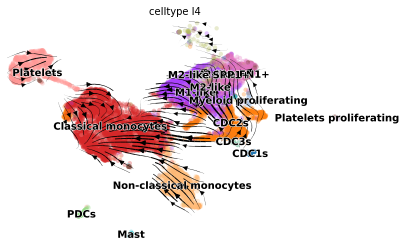

In [19]:
scv.pl.velocity_embedding_stream(maps_velo, basis='umap', color="celltype_l4")

In [ ]:
scv.tl.recover_dynamics(maps_velo)

recovering dynamics (using 1/24 cores)


  0%|          | 0/2731 [00:00<?, ?gene/s]